## Решающие деревья

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Решение должно содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [26]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=21),
    make_moons(noise=0.2, random_state=20),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0)
]

In [27]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

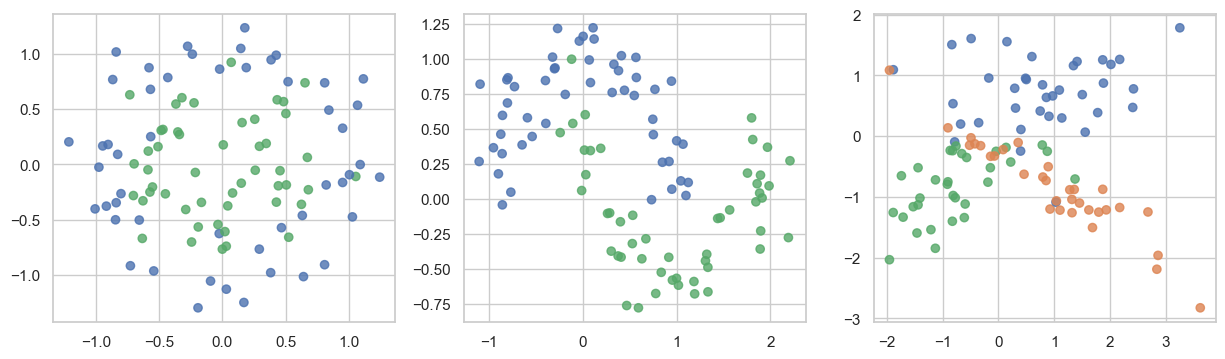

In [28]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [13]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

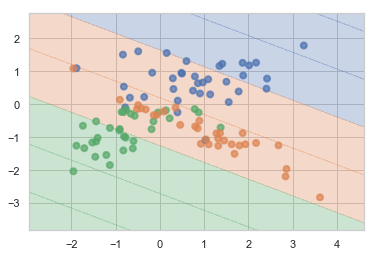

In [14]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Номер набора данных 0
Обучающая выборка: 1.0
Тестовая выборка: 0.85
Номер набора данных 1
Обучающая выборка: 1.0
Тестовая выборка: 0.9
Номер набора данных 2
Обучающая выборка: 1.0
Тестовая выборка: 0.7


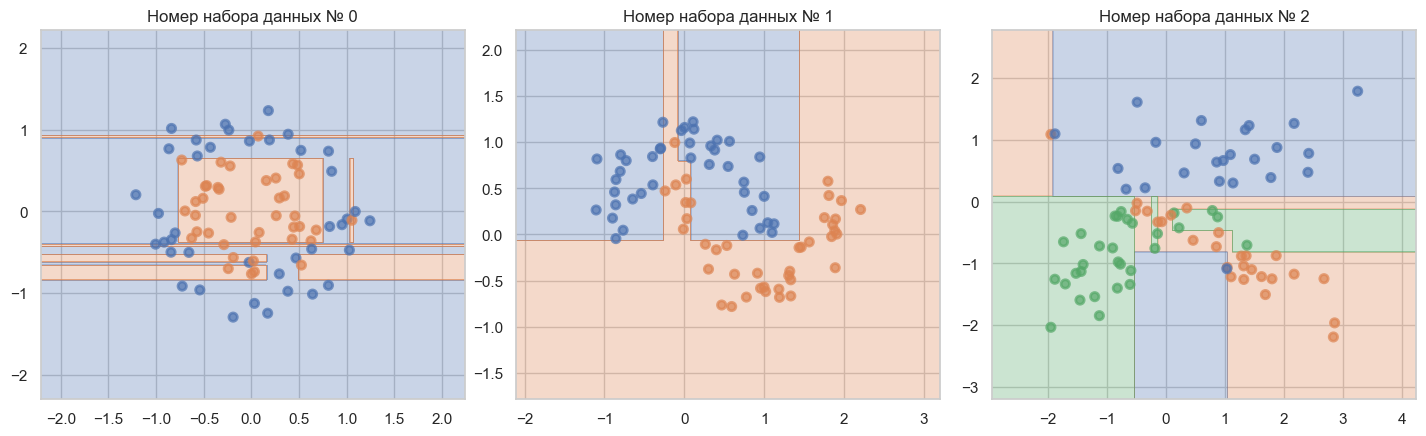

In [29]:
plt.figure(figsize=(15, 5))
for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
    tree = DecisionTreeClassifier().fit(x_train, y_train)
    
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    plt.title('Номер набора данных № %i' %i)
    
    print('Номер набора данных', i)
    print('Обучающая выборка:', tree.score(x_train, y_train))
    print('Тестовая выборка:', tree.score(x_test, y_test))

__Ответ:__ точность на тестовых выборках снизилась, но особенно значительно в наборе данных №2, тут дерево сильно переобучилось.

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

### Перебираем параметр min_samples_leaf 

Номер набора данных 0
Обучающая выборка: 0.925
Тестовая выборка: 0.8
Номер набора данных 1
Обучающая выборка: 0.95
Тестовая выборка: 0.85
Номер набора данных 2
Обучающая выборка: 0.8875
Тестовая выборка: 0.8


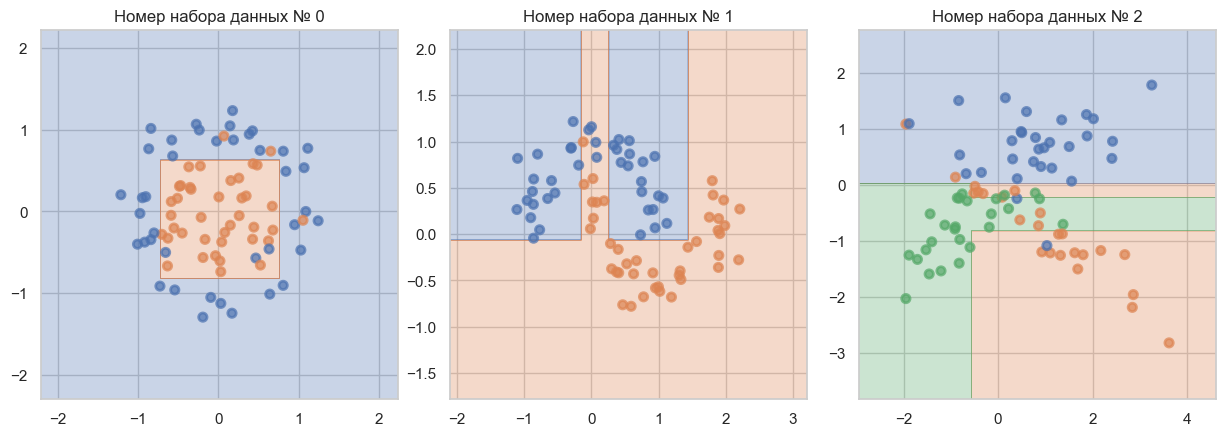

In [30]:
plt.figure(figsize=(13, 5))
for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=127)
    tree = DecisionTreeClassifier(min_samples_leaf=7).fit(x_train, y_train)   #выберем min_samples_leaf=7
    
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    plt.title('Номер набора данных № %i' %i)
    
    print('Номер набора данных', i)
    print('Обучающая выборка:', tree.score(x_train, y_train))
    print('Тестовая выборка:', tree.score(x_test, y_test))

Номер набора данных 0
Обучающая выборка: 0.9375
Тестовая выборка: 0.8
Номер набора данных 1
Обучающая выборка: 0.9875
Тестовая выборка: 0.95
Номер набора данных 2
Обучающая выборка: 0.925
Тестовая выборка: 0.85


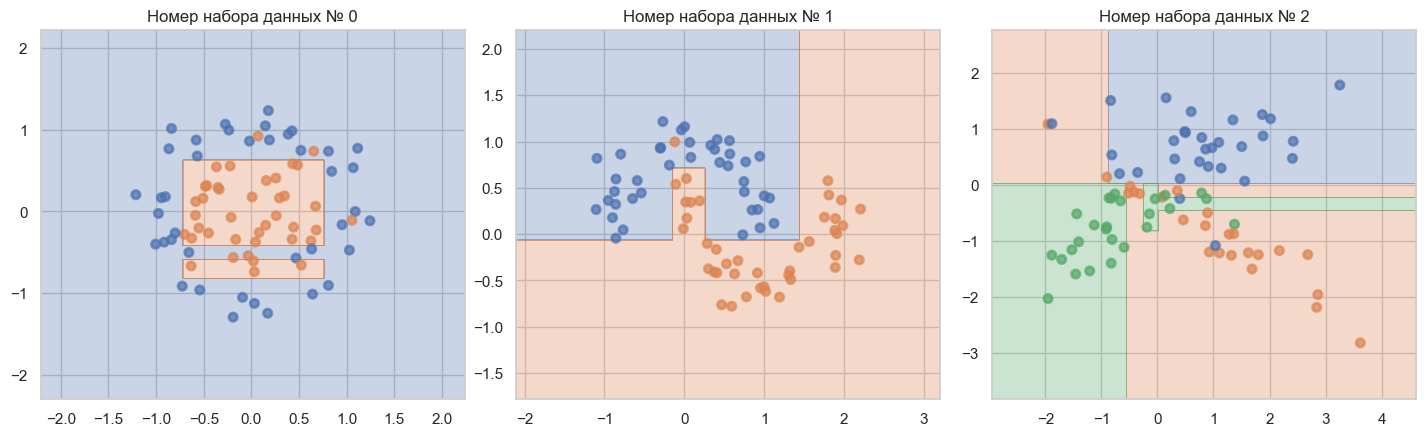

In [34]:
plt.figure(figsize=(15, 5))
for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=127)
    tree = DecisionTreeClassifier(min_samples_leaf=3).fit(x_train, y_train)   #выберем min_samples_leaf=3
    
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    plt.title('Номер набора данных № %i' %i)
    
    print('Номер набора данных', i)
    print('Обучающая выборка:', tree.score(x_train, y_train))
    print('Тестовая выборка:', tree.score(x_test, y_test))

### Перебираем параметр max_depth

Номер набора данных 0
Обучающая выборка: 0.9375
Тестовая выборка: 0.8
Номер набора данных 1
Обучающая выборка: 0.9875
Тестовая выборка: 0.95
Номер набора данных 2
Обучающая выборка: 0.925
Тестовая выборка: 0.8


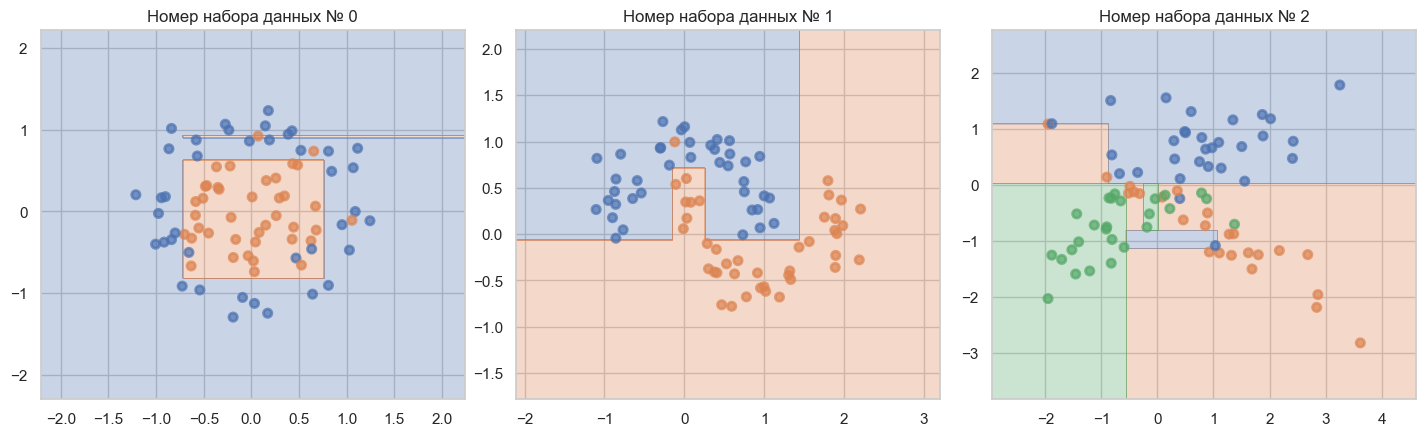

In [35]:
plt.figure(figsize=(15, 5))
for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=127)
    tree = DecisionTreeClassifier(max_depth=5).fit(x_train, y_train)    #выберем  max_depth=5
    
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    plt.title('Номер набора данных № %i' %i)
    
    print('Номер набора данных', i)
    print('Обучающая выборка:', tree.score(x_train, y_train))
    print('Тестовая выборка:', tree.score(x_test, y_test))

Номер набора данных 0
Обучающая выборка: 1.0
Тестовая выборка: 0.8
Номер набора данных 1
Обучающая выборка: 1.0
Тестовая выборка: 0.95
Номер набора данных 2
Обучающая выборка: 1.0
Тестовая выборка: 0.8


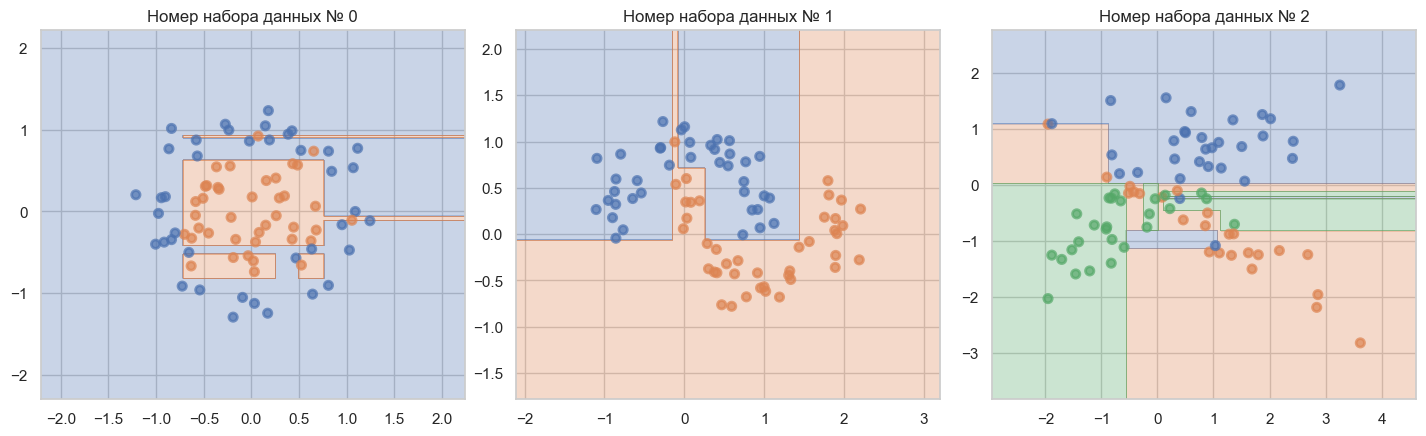

In [36]:
plt.figure(figsize=(15, 5))
for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=127)
    tree = DecisionTreeClassifier(max_depth=15).fit(x_train, y_train)   #выберем  max_depth=15
    
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    plt.title('Номер набора данных № %i' %i)
    
    print('Номер набора данных', i)
    print('Обучающая выборка:', tree.score(x_train, y_train))
    print('Тестовая выборка:', tree.score(x_test, y_test))

__Ответ:__ Графики показывают, как параметры "minsamplesleaf" (минимальное количество выборок в листе) и "max_depth" (максимальная глубина дерева) влияют на работу модели дерева решений. 

Если "minsamplesleaf" высокое, это значит, что в каждом листе дерева должно быть достаточно много данных. А если "max_depth" низкое, то дерево не будет слишком глубоким и сложным.

Для первого набора данных, где классы легко разделяются, лучше всего работают высокие значения "minsamplesleaf" и низкие "max_depth". Это помогает сделать дерево проще и избежать переобучения, когда модель слишком точно подстраивается под данные, включая шум.

Таким образом, с такими настройками модель становится более надежной и точной.


# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [ ]:
# из файла hw5code.py
import numpy as np
from collections import Counter
from sklearn.base import BaseEstimator

def find_best_split(feature_vector, target_vector):
    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

    pass

In [37]:
import numpy as np

def find_best_split(feature_vector, target_vector):
     # Сортируем значения признака и соответствующие целевые значения
    sorted_indices = np.argsort(feature_vector)
    sorted_features = feature_vector[sorted_indices]
    sorted_targets = target_vector[sorted_indices]
    mask = sorted_features[1:] != sorted_features[:-1]
    threshold_vec = ((sorted_features[1:] + sorted_features[:-1]) / 2)[mask]

    R = np.size(sorted_targets)
    R_l_size = np.arange(1, R)
    R_l_1 = np.cumsum(sorted_targets)
    R_l_p1 = R_l_1[:-1] / R_l_size
    R_l_p0 = 1 - R_l_p1

    R_r_1 = R_l_1[-1] - R_l_1[:-1]
    R_r_p1 = R_r_1 / (R - R_l_size)
    R_r_p0 = 1 - R_r_p1

    gini_vec = R_l_size / R * (R_l_p0 ** 2 + R_l_p1 ** 2 - 1) + \
        (R - R_l_size) / R * (R_r_p0 ** 2 + R_r_p1 ** 2 - 1)
    gini_vec = gini_vec[mask]

    ind_best = np.argmax(gini_vec)
    threshold_best = threshold_vec[ind_best]
    gini_best = gini_vec[ind_best]

    return threshold_vec, gini_vec, threshold_best, gini_best

__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('students.csv')

# Разделение на признаки и целевую переменную
X = data.iloc[:, :-1]  # первые 5 столбцов (признаки)
y = data.iloc[:, -1]   # последний столбец (целевая переменная)

def gini_index(y):
    """Функция для расчета критерия Джини."""
    total_count = len(y)
    if total_count == 0:
        return 0
    counts = np.bincount(y)
    probabilities = counts / total_count
    gini = 1 - np.sum(probabilities ** 2)
    return gini

def find_best_split(feature_vector, target_vector):
    """Функция для нахождения лучших порогов и значений критерия Джини."""
    sorted_indices = np.argsort(feature_vector)
    sorted_features = feature_vector[sorted_indices]
    sorted_targets = target_vector[sorted_indices]

    unique_values = np.unique(sorted_features)
    
    thresholds = []
    ginis = []
    
    total_count = len(target_vector)
    
    count_total = Counter(target_vector)
    
    left_count = Counter()
    right_count = count_total.copy()

    for i in range(len(unique_values) - 1):
        left_class = sorted_targets[i]
        left_count[left_class] += 1
        right_count[left_class] -= 1
        
        if i + 1 < total_count and sorted_features[i] == sorted_features[i + 1]:
            continue
        
        left_size = i + 1
        right_size = total_count - left_size
        
        if left_size == 0 or right_size == 0:
            continue
        
        H_left = gini_index(sorted_targets[:left_size])
        H_right = gini_index(sorted_targets[left_size:])
        
        gini = -(left_size / total_count) * H_left - (right_size / total_count) * H_right
        
        thresholds.append((sorted_features[i] + sorted_features[i + 1]) / 2)
        ginis.append(gini)

    thresholds = np.array(thresholds)
    ginis = np.array(ginis)

    best_index = np.argmax(ginis)
    threshold_best = thresholds[best_index]
    gini_best = ginis[best_index]

    return thresholds, ginis

# Построение графиков
plt.figure(figsize=(15, 10))

for i in range(X.shape[1]):
    feature_vector = X.iloc[:, i].values
    target_vector = y.values
    
    thresholds, ginis = find_best_split(feature_vector, target_vector)

    plt.subplot(3, 2, i + 1)
    plt.plot(thresholds, ginis, label=f'Feature {i + 1}')
    plt.title(f'Gini Index vs Threshold for Feature {i + 1}')
    plt.xlabel('Threshold')
    plt.ylabel('Gini Index')
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()

# Построение scatter-графиков
plt.figure(figsize=(15, 10))

for i in range(X.shape[1]):
    plt.subplot(3, 2, i + 1)
    plt.scatter(X.iloc[:, i], y, alpha=0.5)
    plt.title(f'Scatter plot of Feature {i + 1} vs Class')
    plt.xlabel(f'Feature {i + 1}')
    plt.ylabel('Class')
    plt.grid()

plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'students.csv'

__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

#### ответ

##### Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева?

При выборе признака для деления на поддеревья важно смотреть на значение критерия Джини. Признак с высоким значением критерия Джини лучше разделяет классы, что делает его более информативным.


##### Согласуется ли этот результат с визуальной оценкой scatter-графиков?

Если на scatter-графиках видно четкое разделение классов, это соответствует высокому критерию Джини. Такой признак хорош для деления. Если классы переплетены, значение критерия Джини будет низким, и деление по этому признаку не будет эффективным.


##### Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально?  Чем отличаются кривые для признаков, по которым деление практически невозможно?

Кривые хороших признаков показывают резкие изменения в значении критерия Джини, что указывает на четкое разделение классов, а плохих признаков будут плоскими, с низкими значениями критерия, что говорит о трудностях в разделении классов.


__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

In [39]:
from collections import Counter

class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None,
                 min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical",
                           feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf


    def get_params(self, deep=False):
        return {'feature_types': self._feature_types, 
               'max_depth': self._max_depth, 
               'min_samples_split': self._min_samples_split,
               'min_samples_leaf': self._min_samples_leaf}

    def _fit_node(self, sub_X, sub_y, node):
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items(): 
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count 
               
                sorted_categories = sorted(ratio.keys(),
                                           key=lambda k: ratio[k])  
                categories_map = dict(zip(sorted_categories,
                                          range(len(sorted_categories))))  
                feature_vector = np.array([
                        categories_map[x] for x in sub_X[:, feature]])  
            else:
                raise ValueError
            if np.all(feature_vector == feature_vector[0]):
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = list(  
                            map(lambda x: x[0], 
                                filter(
                                        lambda x: x[1] < threshold,
                                        categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self.depth += 1 
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(
                sub_X[np.logical_not(split)],
                sub_y[np.logical_not(split)], node["right_child"])

    def _predict_node(self, x, node):
        if(node['type'] == 'terminal'):
            return node['class']
        else:
            feature_type = self._feature_types[node['feature_split']]
            if(feature_type == 'real'):
                if(x[node['feature_split']] < node['threshold']):
                    return self._predict_node(x, node['left_child'])
                else:
                    return self._predict_node(x, node['right_child'])
            else:
                if(x[node['feature_split']] in node['categories_split']):
                    return self._predict_node(x, node['left_child'])
                else:
                    return self._predict_node(x, node['right_child'])

    def fit(self, X, y):
        self.depth = 1
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [56]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


columns = ['class'] + [f'feature_{i}' for i in range(1, 23)]
df = pd.read_csv('agaricus-lepiota.data', header=None, names=columns)

# преобразование категориальных признаков в числовые
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

X = df.drop('class', axis=1)
y = df['class'] # целевая переменная


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# обучение решающего дерева
clf = DecisionTreeClassifier(max_depth=6)  # чтобы дерево получилось "не очень глубокое"
clf.fit(X_train, y_train)

# Шаг 6: Предсказание и вычисление accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


Как и требовалось, accuracy получилась очень близкой к единице (чем больше глубина тем ближе к единице, начиная с глубины 6 будет единица по accuracy).

__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт). **где в следующем пункте хоть что-то про tic-tac-toe?**

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
<!--- * [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)-->
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [53]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import make_scorer, accuracy_score

# Загрузка данных (я пробовала через юрл, не получилось( )
urls = {
    "mushrooms": "agaricus-lepiota.data",
    "cars": "car.data",
    "nursery": "nursery.data"
}

dataframes = {}
for name, url in urls.items():
    dataframes[name] = pd.read_csv(url)

# Кодирование целевой переменной и категориальных признаков
label_encoders = {}
for name, df in dataframes.items():
    label_encoders[name] = LabelEncoder()
    
    # Кодируем целевую переменную
    if name == "mushrooms":
        df["p"] = label_encoders[name].fit_transform(df["p"])
    else:
        df.iloc[:, -1] = label_encoders[name].fit_transform(df.iloc[:, -1])
    
    # Кодируем остальные категориальные признаки
    for col in df.columns:
        if col != 0:  # Пропускаем целевую переменную
            df[col] = label_encoders[name].fit_transform(df[col])

# DataFrame для хранения результатов
results = pd.DataFrame(index=urls.keys(), columns=["DT (continuous)", "DT (categorical)", "DT (one-hot)"])

# Оценка моделей
for name, df in dataframes.items():
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    # Decision Tree с вещественными признаками (предполагаем все признаки вещественные)
    dt_continuous = DecisionTreeClassifier()
    results.loc[name, "DT (continuous)"] = np.mean(cross_val_score(dt_continuous, X, y, cv=10, scoring=make_scorer(accuracy_score)))

    # Decision Tree с категориальными признаками (признаки уже закодированы)
    dt_categorical = DecisionTreeClassifier()
    results.loc[name, "DT (categorical)"] = np.mean(cross_val_score(dt_categorical, X, y, cv=10, scoring=make_scorer(accuracy_score)))

    # One-Hot Encoding для всех признаков
    one_hot_encoder = OneHotEncoder(sparse_output=False)
    X_one_hot = one_hot_encoder.fit_transform(X)
    
    dt_one_hot = DecisionTreeClassifier()
    results.loc[name, "DT (one-hot)"] = np.mean(cross_val_score(dt_one_hot, X_one_hot, y, cv=10, scoring=make_scorer(accuracy_score)))


print(results)


          DT (continuous) DT (categorical) DT (one-hot)
mushrooms        0.482293         0.482293      0.48217
cars             0.862878           0.8623     0.860566
nursery          0.799061         0.798367     0.777136


__16. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

#### Одинаково ли для разных наборов данных ранжируются алгоритмы? Порассуждайте, почему так происходит.


Нет, не одинаково. Разные наборы данных могут иметь разные распределения классов, количество признаков и их корреляции. Например, в наборе данных с большим количеством категориальных признаков (например, cars или nursery) алгоритмы, использующие one-hot encoding, могут показывать лучшие результаты, чем те, которые работают с закодированными значениями.

####  Присутствует ли в результатах какая-то компонента случайности? Можно ли повлиять на нее и улушить работу алгоритмов?

Да, эта случайность может влиять на результаты оценки моделей из-за случайного выбора данных (при кросс-валидации данные разбиваются на случайные подмножества, отсюда различия в оценках производительности моделей, особенно если набор данных небольшой или имеет неравномерное распределение классов).

Думаю, что можно, например, поробовать фиксировать случайное состояние (фиксированное значение random_state при разбиении на выборки) или увеличивать выборку (так модель достаточно научится, чтобы уменьшить влияние случайных факторов).